## Diamond Project

In [1]:
import pandas as pd
import numpy as np


In [2]:
diamond = pd.read_csv(('./diamonds-datamad0620/train.csv'))
diamond_test = pd.read_csv(('./diamonds-datamad0620/predict.csv'))


In [3]:
diamond.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605
1,1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565
2,2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720
3,3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793
4,4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381


In [4]:
diamond.shape

(40455, 11)

Features
- id: only for test & sample submission files, id for prediction sample identification
- price: price in USD
- carat: weight of the diamond
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)

In [5]:
diamond.info()
# no nun values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


> Its important to pass the cut, clarity and color columns to numerical

In [6]:
#try get dummies
diamond = pd.get_dummies(diamond)
diamond.head()
diamond.columns

Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [7]:
clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color = ['J', 'H', 'I','E','G','F','D']

In [8]:
#diamond["clarity"]=pd.Categorical(diamond["clarity"],ordered=True,categories=clarity)
#diamond["cut"]=pd.Categorical(diamond['cut'],ordered=True,categories=cut)
#diamond["color"]=pd.Categorical(diamond['color'],ordered=True,categories=color)

In [9]:
#diamond['value_clarity'] = diamond["clarity"].cat.codes
#diamond['value_cut'] = diamond['cut'].cat.codes
#diamond['value_color'] = diamond['color'].cat.codes

#diamond.head()

In [10]:
#diamond= diamond.drop(columns=["cut","color",'clarity'])

> Lets start looking at other columns in the data set, like (x,y,z which i will rename): 


In [11]:
diamond = diamond.rename(columns={'x': 'length in mm', 'y': 'width in mm','z': 'depth in mm'})
diamond[['length in mm','width in mm','depth in mm']].describe()

,length in mm,width in mm,depth in mm
count,40455.000000,40455.000000,40455.000000
mean,5.729391,5.733217,3.537644
std,1.121283,1.151076,0.709557
min,0.000000,0.000000,0.000000
25%,4.710000,4.720000,2.910000
50%,5.700000,5.710000,3.530000
75%,6.540000,6.540000,4.040000
max,10.230000,58.900000,31.800000


> By doing the describe we can notice that width, depth and length have 0.0 min values. These is odd, I will replace them for there mean values.

> Also de max value of width looks to high. I will investigate on the matter

In [12]:

diamond["width in mm"]= diamond["width in mm"].replace([0.0], 5.73)
diamond["length in mm"]=diamond["length in mm"].replace([0.0], 5.73)
diamond["depth in mm"]=diamond["depth in mm"].replace([0.0], 3.54)

In [13]:
# min values changed! 
diamond[['length in mm','width in mm','depth in mm']].describe()

,length in mm,width in mm,depth in mm
count,40455.000000,40455.000000,40455.000000
mean,5.730382,5.734067,3.539132
std,1.118747,1.148956,0.705840
min,3.730000,3.680000,1.070000
25%,4.710000,4.720000,2.910000
50%,5.700000,5.710000,3.530000
75%,6.540000,6.540000,4.040000
max,10.230000,58.900000,31.800000



> diamond["length in mm"].unique() # after analyzing all the individual unique values I conclude that there is nothing out or the ordinary
> diamond["depth in mm"].unique()#after analyzing all the individual unique values I conclude that there is one value out of the ordinary
> diamond["width in mm"].unique()#after analyzing all the individual unique values I conclude that there are values out of the ordinary

In [14]:
display (diamond[diamond["width in mm"]>12])
diamond[diamond["depth in mm"]>10]
# these values must have been wrongly written. Im gonna drop them

,id,carat,depth,table,length in mm,width in mm,depth in mm,price,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
12402,12402,0.51,61.8,55.0,5.15,31.8,5.12,2075,0,0,...,0,0,0,0,0,0,1,0,0,0
27676,27676,2.00,58.9,57.0,8.09,58.9,8.06,12210,0,0,...,0,0,0,0,0,1,0,0,0,0


,id,carat,depth,table,length in mm,width in mm,depth in mm,price,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
38759,38759,0.51,61.8,54.7,5.12,5.15,31.8,1970,0,0,...,0,0,0,0,0,0,1,0,0,0


In [15]:
diamond["width in mm"]=diamond["width in mm"].replace([31.8], 5.73)
diamond["width in mm"]=diamond["width in mm"].replace([58.9], 5.73)
diamond["depth in mm"]=diamond["depth in mm"].replace([31.8], 3.53)

In [16]:
diamond[['length in mm','width in mm','depth in mm']].describe()

,length in mm,width in mm,depth in mm
count,40455.000000,40455.000000,40455.000000
mean,5.730382,5.732109,3.538433
std,1.118747,1.110599,0.691713
min,3.730000,3.680000,1.070000
25%,4.710000,4.720000,2.910000
50%,5.700000,5.710000,3.530000
75%,6.540000,6.540000,4.040000
max,10.230000,10.160000,8.060000


In [17]:
diamond.head()

,id,carat,depth,table,length in mm,width in mm,depth in mm,price,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.30,62.8,56.0,4.29,4.31,2.70,605,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0.34,62.6,55.0,4.46,4.49,2.80,565,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,0.40,60.3,62.0,4.70,4.75,2.85,720,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,0.40,61.8,59.2,4.72,4.74,2.92,793,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0.90,61.0,63.0,6.10,6.13,3.73,4381,0,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
#diamond= diamond.drop(columns=["table"])

In [19]:
diamond.to_csv("inputs/clean_train.csv", header=True,index=False)

 > Hemos cambiado las columnas ya que habia valores que estaban fuera de rango.
## considerar si cargarse table??

## DIVIDE THE COLUMNS TO CREATE X and y 

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.datasets import load_diabetes
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn  import tree
from sklearn.model_selection import GridSearchCV


In [21]:
X = diamond.drop(columns="price")
y = diamond["price"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

> Training different models

In [23]:
models = {
   "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForest" : RandomForestRegressor(),
    "RandomForestN200" : RandomForestRegressor(n_estimators = 200),
    "RandomForestN900" : RandomForestRegressor(n_estimators = 900, ),
    "GradientBoosting" : GradientBoostingRegressor(n_estimators = 900),
    "HistGradinetBoostingClass2": HistGradientBoostingRegressor(),
    "ExtraTreeRegressor": ExtraTreesRegressor(n_estimators = 900,n_jobs =1, min_samples_split= 5, random_state=5, max_features = 0.9, warm_start=True),
    "neigbor":KNeighborsRegressor(),
    "tree":tree.DecisionTreeClassifier()
}


In [24]:
for name, model in models.items():
    print(f"Training {name}")
    model.fit(X_train,y_train)
print("He acabado :) ")

Training DecisionTreeRegressor
Training RandomForest
Training RandomForestN200
Training RandomForestN900
Training GradientBoosting
Training HistGradinetBoostingClass2
Training ExtraTreeRegressor
Training neigbor
Training tree
He acabado :) 


In [25]:
comparar= {modelName:model.predict(X_test) for modelName, model in models.items()}
df = pd.DataFrame(comparar)
df

,DecisionTreeRegressor,RandomForest,RandomForestN200,RandomForestN900,GradientBoosting,HistGradinetBoostingClass2,ExtraTreeRegressor,neigbor,tree
0,1656.0,1646.51,1651.480,1655.968889,1710.541924,1689.649375,1682.638148,1025.8,1614
1,2086.0,1979.03,1974.910,1976.755556,1893.102263,1893.616379,1956.020741,1939.8,1999
2,7911.0,7917.97,7776.665,7887.743333,8050.964812,8616.845431,7734.889907,4954.6,7840
3,3255.0,3489.08,3465.785,3500.276667,3704.453209,3686.351068,3566.716204,4250.4,3415
4,2866.0,3092.64,3122.985,3130.226667,3209.757232,3358.022620,3071.454907,6452.6,2873
...,...,...,...,...,...,...,...,...,...
8086,942.0,855.90,847.990,854.630000,847.154142,794.397558,887.248704,1709.4,942
8087,4362.0,4258.98,4292.370,4231.970000,3935.675591,3829.531323,4252.407685,3669.0,3082
8088,1883.0,1895.66,1893.995,1895.286667,2136.457971,2108.974645,1899.098241,1130.4,1883
8089,6466.0,6906.40,6744.860,6704.917778,9260.203604,9505.274450,8327.588796,7508.4,4612


In [26]:
printMetric= lambda label,value:print(f"\t {label}: {round(value,4)}")
for name,m in models.items():
    y_pred = m.predict(X_test)
    print (f"Analyzing -- {name}")
    
    printMetric ("THE RMSE IS:", math.sqrt(mean_squared_error(y_test,y_pred)))


Analyzing -- DecisionTreeRegressor
	 THE RMSE IS:: 749.1476
Analyzing -- RandomForest
	 THE RMSE IS:: 559.1907
Analyzing -- RandomForestN200
	 THE RMSE IS:: 558.8149
Analyzing -- RandomForestN900
	 THE RMSE IS:: 558.7134
Analyzing -- GradientBoosting
	 THE RMSE IS:: 598.38
Analyzing -- HistGradinetBoostingClass2
	 THE RMSE IS:: 561.2608
Analyzing -- ExtraTreeRegressor
	 THE RMSE IS:: 536.5739
Analyzing -- neigbor
	 THE RMSE IS:: 3687.2756
Analyzing -- tree
	 THE RMSE IS:: 1219.4255


## Grid Search of RandomForest 900

In [27]:

#rfc = RandomForestRegressor()

#grid = GridSearchCV(rfc,params,verbose=1)
#grid.fit(X_train,y_train)

In [28]:
#params = {
 #    "criterion":["mse", "mae"]
#}
#rfc = RandomForestRegressor()

#grid = GridSearchCV(rfc,params,verbose=1)
#grid.fit(X_train,y_train)

## APPLY CLEAN TO PREDICT DATASET

In [29]:
diamond_test.head()


,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,2.36,Ideal,I,SI2,60.8,54.0,8.68,8.57,5.24
1,1,2.04,Ideal,H,SI2,62.0,56.0,8.18,8.23,5.09
2,2,0.51,Ideal,I,SI1,61.7,54.0,5.18,5.19,3.20
3,3,0.30,Ideal,I,SI1,61.3,56.0,4.32,4.33,2.65
4,4,0.96,Fair,H,VS2,68.8,56.0,6.11,5.98,4.16


In [30]:
diamond_test = pd.get_dummies(diamond_test)
diamond_test.head()
diamond_test.columns

Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [31]:
#diamond_test["clarity"]=pd.Categorical(diamond_test["clarity"],ordered=True,categories=clarity)
#diamond_test["cut"]=pd.Categorical(diamond_test['cut'],ordered=True,categories=cut)
#diamond_test["color"]=pd.Categorical(diamond_test['color'],ordered=True,categories=color)

In [32]:
#diamond_test['value_clarity'] = diamond_test["clarity"].cat.codes
#diamond_test['value_cut'] = diamond_test['cut'].cat.codes
#diamond_test['value_color'] = diamond_test['color'].cat.codes

#diamond_test.head()

In [33]:
#diamond_test= diamond_test.drop(columns=["cut","color",'clarity'])

In [34]:
diamond_test = diamond_test.rename(columns={'x': 'length in mm', 'y': 'width in mm','z': 'depth in mm'})
diamond_test[['length in mm','width in mm','depth in mm']].describe()

,length in mm,width in mm,depth in mm
count,13485.000000,13485.000000,13485.000000
mean,5.736456,5.738452,3.542003
std,1.123217,1.114912,0.694010
min,0.000000,0.000000,0.000000
25%,4.720000,4.730000,2.920000
50%,5.700000,5.710000,3.530000
75%,6.530000,6.530000,4.030000
max,10.740000,10.540000,6.980000


In [35]:
diamond_test["width in mm"]= diamond_test["width in mm"].replace([0.0], 5.73)
diamond_test["length in mm"]=diamond_test["length in mm"].replace([0.0], 5.73)
diamond_test["depth in mm"]=diamond_test["depth in mm"].replace([0.0], 3.54)

In [36]:
diamond_test["width in mm"]=diamond_test["width in mm"].replace([31.8], 5.73)
diamond_test["width in mm"]=diamond_test["width in mm"].replace([58.9], 5.73)
diamond_test["depth in mm"]=diamond_test["depth in mm"].replace([31.8], 3.53)

In [37]:
diamond_test.describe()


,id,carat,depth,table,length in mm,width in mm,depth in mm,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,...,13485.000000,13485.00000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000
mean,6742.000000,0.800309,61.757783,57.468053,5.736881,5.738877,3.542791,0.031442,0.091212,0.398665,...,0.098925,0.05228,0.014831,0.034409,0.241157,0.174268,0.149870,0.225510,0.064887,0.095069
std,3892.928525,0.477423,1.437478,2.231002,1.122130,1.113816,0.691996,0.174516,0.287922,0.489642,...,0.298572,0.22260,0.120882,0.182283,0.427801,0.379354,0.356957,0.417933,0.246335,0.293321
min,0.000000,0.200000,44.000000,51.000000,3.730000,3.710000,1.410000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3371.000000,0.400000,61.000000,56.000000,4.720000,4.730000,2.920000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6742.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10113.000000,1.040000,62.500000,59.000000,6.530000,6.530000,4.030000,0.000000,0.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,13484.000000,5.010000,73.600000,79.000000,10.740000,10.540000,6.980000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
diamond_test.shape

(13485, 27)

   ## First model try - RandomForestRegressor

In [39]:
model = RandomForestRegressor( n_estimators = 900)
model.fit(X, y)

RandomForestRegressor(n_estimators=900)

In [40]:
y_pred = model.predict(diamond_test)

In [41]:
y_pred = pd.DataFrame(y_pred).reset_index()
y_pred = y_pred.rename(columns={"index": "id",0:"price"})


In [42]:
y_pred.head()


,id,price
0,0,14527.550000
1,1,15910.067778
2,2,1003.558889
3,3,452.197778
4,4,3582.232222


In [43]:
y_pred.shape

(13485, 2)

In [44]:
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_predict
import seaborn as sns

> Model to draw scatter plot with the ground truth and predict

In [45]:
model_graph = RandomForestRegressor( n_estimators = 900)
model_graph.fit(X_train,y_train)
y_pred_graph = model.predict(X_test)

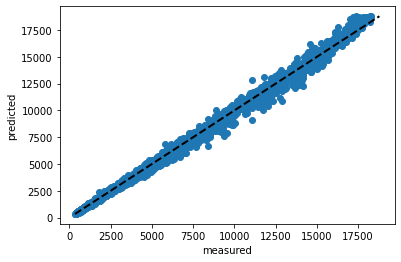

In [46]:
plt.scatter(y_pred_graph,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('measured')
plt.ylabel('predicted')
plt.show()

#merged_df = pd.concat([df1, df2['feat3','feat4'],axis=1)

In [47]:
y_pred.to_csv("./outputs/RandomForestRegressor1.csv", header= True, index=False)

## Second model - HistGradientBoosting

In [72]:
model = HistGradientBoostingRegressor()
model.fit(X, y)



HistGradientBoostingRegressor()

In [73]:
y_pred = model.predict(diamond_test)

In [74]:
y_pred = pd.DataFrame(y_pred, columns=["price"])
y_pred = y_pred.reset_index()
y_pred = y_pred.rename(columns={'index':'id'})

In [75]:
y_pred.head()

,id,price
0,0,16010.025359
1,1,15628.188934
2,2,1248.997594
3,3,485.219207
4,4,3144.581876


In [76]:
model_graph = HistGradientBoostingRegressor()
model_graph.fit(X_train,y_train)
y_pred_graph = model.predict(X_test)

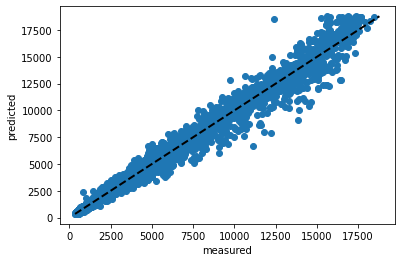

In [77]:
plt.scatter(y_pred_graph,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('measured')
plt.ylabel('predicted')
plt.show()

In [54]:
y_pred.to_csv("./outputs/HistGradeint.csv", header= True, index=False)

## third model -- GradientBoosting
   

In [78]:
model = GradientBoostingRegressor(n_estimators = 900)
model.fit(X, y)

GradientBoostingRegressor(n_estimators=900)

In [79]:
y_pred = model.predict(diamond_test)

In [80]:
y_pred = pd.DataFrame(y_pred, columns=["price"])
y_pred = y_pred.reset_index()
y_pred = y_pred.rename(columns={'index':'id'})

In [81]:
y_pred.head()

,id,price
0,0,13852.278461
1,1,14014.204147
2,2,1066.889837
3,3,458.758161
4,4,3939.723978


In [82]:
model_graph = GradientBoostingRegressor(n_estimators = 900)
model_graph.fit(X_train,y_train)
y_pred_graph = model.predict(X_test)

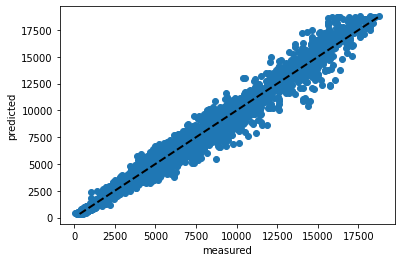

In [83]:
plt.scatter(y_pred_graph,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('measured')
plt.ylabel('predicted')
plt.show()

In [61]:
y_pred.to_csv("./outputs/GradientBoosting.csv", header= True, index=False)

## FOURTH 

In [84]:
model = ExtraTreesRegressor(n_estimators = 900,n_jobs =1, min_samples_split= 5, random_state=5, max_features = 0.9, warm_start=True)
model.fit(X, y)

ExtraTreesRegressor(max_features=0.9, min_samples_split=5, n_estimators=900,
                    n_jobs=1, random_state=5, warm_start=True)

In [85]:
y_pred = model.predict(diamond_test)

In [86]:
y_pred = pd.DataFrame(y_pred, columns=["price"])
y_pred = y_pred.reset_index()
y_pred = y_pred.rename(columns={'index':'id'})

In [87]:
y_pred.head()

,id,price
0,0,13839.426019
1,1,15445.908426
2,2,1007.035093
3,3,447.799722
4,4,3869.624259


In [88]:
model_graph = ExtraTreesRegressor(n_estimators = 900,n_jobs =1, min_samples_split= 5, random_state=5, max_features = 0.9, warm_start=True)
model_graph.fit(X_train,y_train)
y_pred_graph = model.predict(X_test)

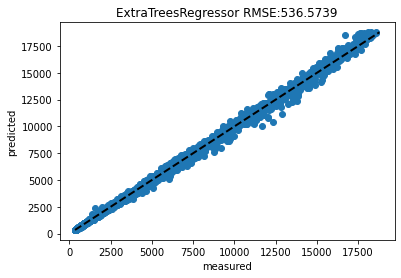

In [91]:
plt.scatter(y_pred_graph,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('measured')
plt.ylabel('predicted')
plt.title("ExtraTreesRegressor RMSE:536.5739" )
plt.show()

In [69]:
y_pred.to_csv("./outputs/ExtraTreesRegressor2.csv", header= True, index=False)